In [ ]:
!pip install tensorflow

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, auc, roc_auc_score, roc_curve
from tensorflow.keras.models import load_model
from tensorflow import keras 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

In [107]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
print(y_train.shape, y_test.shape)


y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print(y_train.shape, y_test.shape)

(60000, 28, 28) (60000,)
(60000,) (10000,)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(60000, 10) (10000, 10)


In [6]:
batch_size = 128
num_classes = 10
epochs = 30
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")
y_pred = model.predict(x_test)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save('mnist.h5')
print("Saving the model as mnist.h5")


Epoch 1/30
469/469 [==============================] - 12s 24ms/step - loss: 2.3008 - accuracy: 0.1076 - val_loss: 2.2855 - val_accuracy: 0.1081
Epoch 2/30
469/469 [==============================] - 11s 23ms/step - loss: 2.2849 - accuracy: 0.1266 - val_loss: 2.2702 - val_accuracy: 0.1567
Epoch 3/30
469/469 [==============================] - 12s 25ms/step - loss: 2.2714 - accuracy: 0.1499 - val_loss: 2.2557 - val_accuracy: 0.2165
Epoch 4/30
469/469 [==============================] - 12s 26ms/step - loss: 2.2597 - accuracy: 0.1734 - val_loss: 2.2416 - val_accuracy: 0.3018
Epoch 5/30
469/469 [==============================] - 12s 26ms/step - loss: 2.2459 - accuracy: 0.1928 - val_loss: 2.2266 - val_accuracy: 0.3871
Epoch 6/30
469/469 [==============================] - 13s 28ms/step - loss: 2.2337 - accuracy: 0.2119 - val_loss: 2.2103 - val_accuracy: 0.4618
Epoch 7/30
469/469 [==============================] - 12s 26ms/step - loss: 2.2191 - accuracy: 0.2324 - val_loss: 2.1924 - val_accuracy:

In [23]:
model = load_model('mnist.h5')
def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    img = img.reshape(1,28,28,1)
    img = img/255.0
    img = 1 - img
    #predicting
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

#predict_digit(x_test[0])
#print(x_test[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [68]:
# Compute confusion matrix
print("ytest",y_test,y_test.shape)
print(y_pred)
yp = np.round([[1 if e == np.argmax(arr) else 0 for arr in y_pred for e in range(len(arr))]]).reshape(y_test.shape[0],-1).astype("float32")
yp.astype("float32")
yp
print(type(y_test), type(yp))

confusion_matrix(
    y_test.argmax(axis=1), yp.argmax(axis=1))

#array([[1, 0],
#       [0, 2]])


ytest [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (10000, 10)
[[0.04856478 0.0194943  0.03290245 ... 0.52600086 0.07617689 0.11400586]
 [0.08071245 0.15030333 0.13693435 ... 0.01903542 0.05838073 0.02619325]
 [0.0270273  0.4376053  0.04995548 ... 0.052628   0.06814744 0.08540028]
 ...
 [0.02561745 0.04937463 0.03933642 ... 0.20489398 0.14777182 0.25342506]
 [0.0579846  0.11702707 0.04701737 ... 0.08641621 0.17398855 0.09249549]
 [0.14104049 0.02117074 0.11381148 ... 0.00651915 0.02805488 0.01935799]]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


array([[ 943,    1,    2,   11,    0,    0,   15,    1,    7,    0],
       [   0, 1123,    0,    6,    0,    1,    5,    0,    0,    0],
       [  62,   41,  685,   35,    1,    0,  143,   48,   14,    3],
       [  14,   24,   10,  889,    0,    0,   14,   23,   25,   11],
       [  16,   17,   20,    0,  212,    0,   58,   56,   17,  586],
       [  79,   86,    0,  300,    9,  258,   66,   40,   35,   19],
       [  37,   40,    5,    0,    0,    2,  871,    1,    1,    1],
       [   7,   31,   22,    1,    1,    0,    5,  877,    5,   79],
       [  54,  128,   16,  105,    1,    6,   26,   70,  498,   70],
       [  30,   27,   11,   13,   10,    0,    4,   83,    9,  822]],
      dtype=int64)


Confusion matrix:
 [[ 943    1    2   11    0    0   15    1    7    0]
 [   0 1123    0    6    0    1    5    0    0    0]
 [  62   41  685   35    1    0  143   48   14    3]
 [  14   24   10  889    0    0   14   23   25   11]
 [  16   17   20    0  212    0   58   56   17  586]
 [  79   86    0  300    9  258   66   40   35   19]
 [  37   40    5    0    0    2  871    1    1    1]
 [   7   31   22    1    1    0    5  877    5   79]
 [  54  128   16  105    1    6   26   70  498   70]
 [  30   27   11   13   10    0    4   83    9  822]]
[7 2 1 ... 4 5 6]
[7 6 1 ... 9 5 6]


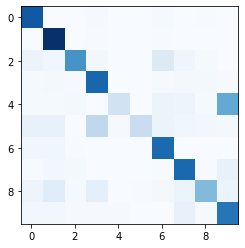

<Figure size 432x288 with 0 Axes>

Accuracy: 0.7178
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.96      0.85       980
           1       0.74      0.99      0.85      1135
           2       0.89      0.66      0.76      1032
           3       0.65      0.88      0.75      1010
           4       0.91      0.22      0.35       982
           5       0.97      0.29      0.45       892
           6       0.72      0.91      0.80       958
           7       0.73      0.85      0.79      1028
           8       0.82      0.51      0.63       974
           9       0.52      0.81      0.63      1009

   micro avg       0.72      0.72      0.72     10000
   macro avg       0.77      0.71      0.69     10000
weighted avg       0.77      0.72      0.69     10000
 samples avg       0.72      0.72      0.72     10000

Precision score: 0.76708538232832
Recall: 0.7178
F1 score 0.69046327321788


0.8387400186625881

In [94]:
# Compute confusion matrix
cmap=plt.cm.Blues
print("\nConfusion matrix:\n",metrics.confusion_matrix(y_test.argmax(axis=1), yp.argmax(axis=1)) )
cm = confusion_matrix(y_test.argmax(axis=1), yp.argmax(axis=1))
print(y_test.argmax(axis=1))
print(yp.argmax(axis=1))
np.set_printoptions(precision=2)

plt.imshow(cm, interpolation='nearest', cmap=cmap)
# Plot non-normalized confusion matrix
plt.figure()
plt.show()



print("Accuracy:",metrics.accuracy_score(y_test, yp))
print("Classification report:\n",metrics.classification_report(y_test, yp))
print("Precision score:",metrics.precision_score(y_test, yp, average= 'weighted'))
print("Recall:",metrics.recall_score(y_test, yp, average= 'weighted'))
print("F1 score",metrics.f1_score(y_test, yp, average= 'weighted'))

roc_auc_score(y_test,yp,multi_class='ova')

[1 6 4 4 6 4 4 3 7 2 3 6 3 5 1 2 5 5 3 5]
1


# TYPE 2

In [111]:

df_train = pd.read_csv('mnist_train.csv')
df_test = pd.read_csv('mnist_test.csv')


print(df_train.shape)
print(df_test.shape)
X_train = df_train.iloc[:,1:].values
X_test = df_test.iloc[:,1:].values
ytrain = df_train.iloc[:,0].values
ytest = df_test.iloc[:,0].values
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)


ytrain = keras.utils.to_categorical(ytrain, 10)
ytest = keras.utils.to_categorical(ytest, 10)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(ytrain)
ytest

(27999, 785)
(10000, 785)
x_train shape: (27999, 28, 28, 1)
27999 train samples
10000 test samples
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [112]:
batch_size = 128
num_classes = 10
epochs = 30
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
hist = model.fit(X_train, ytrain,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, ytest))
print("The model has successfully trained")
ypred = model.predict(X_test)
score = model.evaluate(X_test, ytest, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save('Mnist.h5')
print("Saving the model as Mnist.h5")
model = load_model('Mnist.h5')

Epoch 1/30
219/219 [==============================] - 7s 29ms/step - loss: 2.3087 - accuracy: 0.1090 - val_loss: 2.2945 - val_accuracy: 0.1079
Epoch 2/30
219/219 [==============================] - 6s 29ms/step - loss: 2.2984 - accuracy: 0.1188 - val_loss: 2.2833 - val_accuracy: 0.1329
Epoch 3/30
219/219 [==============================] - 6s 29ms/step - loss: 2.2877 - accuracy: 0.1284 - val_loss: 2.2726 - val_accuracy: 0.1765
Epoch 4/30
219/219 [==============================] - 7s 30ms/step - loss: 2.2789 - accuracy: 0.1409 - val_loss: 2.2624 - val_accuracy: 0.2335
Epoch 5/30
219/219 [==============================] - 6s 29ms/step - loss: 2.2697 - accuracy: 0.1554 - val_loss: 2.2528 - val_accuracy: 0.3029
Epoch 6/30
219/219 [==============================] - 7s 31ms/step - loss: 2.2616 - accuracy: 0.1636 - val_loss: 2.2433 - val_accuracy: 0.3599
Epoch 7/30
219/219 [==============================] - 7s 30ms/step - loss: 2.2536 - accuracy: 0.1752 - val_loss: 2.2336 - val_accuracy: 0.4010

In [113]:
# Compute confusion matrix
print("ytest",ytest,ytest.shape)
print(ypred)
y_p = np.round([[1 if e == np.argmax(arr) else 0 for arr in ypred for e in range(len(arr))]]).reshape(ytest.shape[0],-1).astype("float32")
y_p.astype("float32")
y_p



ytest [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (10000, 10)
[[0.08 0.09 0.09 ... 0.21 0.08 0.1 ]
 [0.11 0.09 0.14 ... 0.07 0.12 0.04]
 [0.08 0.14 0.11 ... 0.1  0.13 0.07]
 ...
 [0.06 0.1  0.07 ... 0.14 0.12 0.12]
 [0.09 0.11 0.09 ... 0.1  0.13 0.07]
 [0.15 0.07 0.12 ... 0.07 0.07 0.06]]


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)


Confusion matrix:
 [[939   0   0   7   0   0  22   2  10   0]
 [  0 906   0  26   0   1  11  14 177   0]
 [ 66   1 728 102   5   1  58  33  38   0]
 [ 12   0  22 919   0   5   2  25  24   1]
 [ 10   1   0   7 317   0 204  53  31 359]
 [ 36   2   5 304  10 284  40  15 193   3]
 [ 43   1   5   0   1  18 860   0  30   0]
 [  4  16  24   2   4   0   4 937  25  12]
 [ 15   2   6 181   0  16  54  64 634   2]
 [ 24   2   0  32  50   0  32 268  33 568]]
[7 2 1 ... 4 5 6]
[7 3 1 ... 7 8 6]


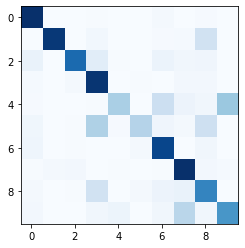

<Figure size 432x288 with 0 Axes>

Accuracy: 0.7092
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.96      0.88       980
           1       0.97      0.80      0.88      1135
           2       0.92      0.71      0.80      1032
           3       0.58      0.91      0.71      1010
           4       0.82      0.32      0.46       982
           5       0.87      0.32      0.47       892
           6       0.67      0.90      0.77       958
           7       0.66      0.91      0.77      1028
           8       0.53      0.65      0.58       974
           9       0.60      0.56      0.58      1009

   micro avg       0.71      0.71      0.71     10000
   macro avg       0.75      0.70      0.69     10000
weighted avg       0.75      0.71      0.70     10000
 samples avg       0.71      0.71      0.71     10000

Precision score: 0.7473762255962716
Recall: 0.7092
F1 score 0.6952291766386669


0.8356509869881412

In [114]:
# Compute confusion matrix
cmap=plt.cm.Blues
print("\nConfusion matrix:\n",metrics.confusion_matrix(ytest.argmax(axis=1), y_p.argmax(axis=1)) )
cm = confusion_matrix(ytest.argmax(axis=1), y_p.argmax(axis=1))
print(ytest.argmax(axis=1))
print(y_p.argmax(axis=1))
np.set_printoptions(precision=2)

plt.imshow(cm, interpolation='nearest', cmap=cmap)
# Plot non-normalized confusion matrix
plt.figure()
plt.show()



print("Accuracy:",metrics.accuracy_score(ytest, y_p))
print("Classification report:\n",metrics.classification_report(ytest, y_p))
print("Precision score:",metrics.precision_score(ytest, y_p, average= 'weighted'))
print("Recall:",metrics.recall_score(ytest, y_p, average= 'weighted'))
print("F1 score",metrics.f1_score(ytest, y_p, average= 'weighted'))

roc_auc_score(ytest,y_p,multi_class='ovo')